<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CS/MATH 3414 by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

In [ ]:
%matplotlib inline
%precision 3
import numpy
import matplotlib.pyplot as plt

# Linear systems of equations

Let us start by considering a polynomial $\mathcal{P}_n(x) = p_0 + p_1 x + p_2 x^2 + \cdots + p_{n-1} x^{n-1}$ and requiring the value of the polynomial to match our desired values at a number of points $(x_i, y_i), ~~ i = 0,1, 2, \ldots, m-1$ . 


$$
\begin{align*}
\mathcal{P}_n(x_0) &= p_0 + p_1 x_0 + p_2 {x_0}^2 + \cdots + p_{n-1} {x_0}^{n-1}, \\[10pt]
\mathcal{P}_n(x_1) &= p_0 + p_1 x_2 + p_2 {x_1}^2 + \cdots + p_{n-1} {x_1}^{n-1}, \\[10pt]
\vdots \qquad & \qquad  \qquad \qquad  \vdots  \qquad  \qquad \qquad  \vdots\\[10pt]
\mathcal{P}_n(x_{m-1}) &= p_0 + p_1 x_{m-1} + p_2 {x_{m-1}}^2 + \cdots + p_{n-1} {x_{m-1}}^{n-1}. \\[10pt]
\end{align*}
$$


Writing the equations in matrix form gives us  the linear system.

$$A \vec{p} = \vec{y}, \quad \quad
A = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{n-1}
\end{bmatrix}, \quad \quad \vec p = \begin{bmatrix}
p_0 \\ p_1 \\ \vdots \\ p_{n-1}
\end{bmatrix},
\quad \quad \vec y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}.
$$



We have $m$ equations for $n$ unknowns, therefore, $A$ is an $m \times n$ matrix, denoted as being in $\mathbb{R}^{m\times n}$, and $\vec{p}$ and $\vec{y}$ are column vectors with $n$ and $m$   entries respectibely.

### Geometric  interpretation of linear systems

### Algebraic interpretation of linear systems

One of the most basic operations we can perform with matrices is to multiply them be a vector.  This matrix-vector product $A \vec{x} = \vec{b}$ is defined as
$$
    b_i = \sum^n_{j=1} a_{ij} x_j \quad \text{where}\quad i = 1, \ldots, m
$$

Writing the matrix-vector product this way we see that one interpretation of this product is that each column of $A$ is weighted by the value $x_j$, or in other words $\vec{b}$ is a linear combination of the columns of $A$ where each column's weighting is $x_j$.
$$
\begin{align}
    \vec{b} &= A \vec{x}, \\
    \vec{b} &= 
    \begin{bmatrix}  &  &  &  \\  &  &  &  \\ \vec{a}_1 & \vec{a}_2 & \cdots & \vec{a}_n \\  &  &  &   \\  &  &  &  \end{bmatrix}
    \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}, \\
    \vec{b} &= x_1 \vec{a}_1 + x_2 \vec{a}_2 + \cdots + x_n \vec{a}_n.
\end{align}
$$

This view will be useful later when we are trying to interpret various types of matrices.

One important property of the matrix-vector product is that is a **linear** operation, also known as a **linear operator**.  This means that the for any $\vec{x}, \vec{y} \in \mathbb{C}^n$ and any $c \in \mathbb{C}$ we know that

1. $A (\vec{x} + \vec{y}) = A\vec{x} + A\vec{y}$
1. $A\cdot (c\vec{x}) = c A \vec{x}$

#### Example:  Numerical matrix-vector multiply

Write a matrix-vector multiply function and check it with the appropriate `numpy` routine.  Also verify the linearity of the matrix-vector multiply.

In [ ]:
#A x = b
#(m x n) (n x 1) = (m x 1)
def matrix_vector_product(A, x):
    m, n = A.shape
    b = numpy.zeros(m)
    for i in range(m):
        for j in range(n):
            b[i] += A[i, j] * x[j]
    return b

m = 4
n = 3
A = numpy.random.uniform(size=(m,n))
x = numpy.random.uniform(size=(n))
y = numpy.random.uniform(size=(n))
c = numpy.random.uniform()
b = matrix_vector_product(A, x)
print(numpy.allclose(b, numpy.dot(A, x)))
print(numpy.allclose(matrix_vector_product(A, (x + y)), matrix_vector_product(A, x) + matrix_vector_product(A, y)))
print(numpy.allclose(matrix_vector_product(A, c * x), c*matrix_vector_product(A, x)))

### Matrix-Matrix Multiplication

The matrix product with another matrix $A C = B$ is defined as
$$
    b_{ij} = \sum^m_{k=1} a_{ik} c_{kj}.
$$
Again, a useful interpretation of this operation is that the product result $B$ is the a linear combination of the columns of $A$.

What are the dimensions of $A$ and $C$ so that the multiplication works?

#### Example:  Outer Product

The product of two vectors $\vec{u} \in \mathbb{C}^m$ and $\vec{v} \in \mathbb{C}^n$ is a $m \times n$ matrix where the columns are the vector $u$ multiplied by the corresponding value of $v$:
$$
\begin{align}
    \vec{u} \vec{v}^T &= 
    \begin{bmatrix}  u_1 \\ u_2 \\ \vdots \\ u_n  \end{bmatrix}
    \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}, \\
    & = \begin{bmatrix} v_1u_1 & \cdots & v_n u_1 \\ \vdots &  & \vdots \\ v_1 u_m & \cdots & v_n u_m \end{bmatrix}.
\end{align}
$$

It is useful to think of these as operations on the column vectors, and an equivalent way to express this relationship is 
$$
\begin{align}
    \vec{u} \vec{v}^T &=
    \begin{bmatrix}  \\ \vec{u} \\ \\  \end{bmatrix}
    \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}, \\
    &=
    \begin{bmatrix}  &  &  &  \\  &  &  &  \\ \vec{u}v_1  & \vec{u} v_2  & \cdots & \vec{u} v_n  \\  &  &  & \\  &  &  &  \end{bmatrix}, \\
    & = \begin{bmatrix} v_1u_1 & \cdots & v_n u_1 \\ \vdots &  & \vdots \\ v_1 u_m & \cdots & v_n u_m \end{bmatrix}.
\end{align}
$$
*

#### Example: Write Matrix-Matrix Multiplication

Write a function that computes matrix-matrix multiplication and demonstrate the following properties:
1. $A (B + C) = AB + AC$ (for square matrices))
1. $A (cB) = c AB$ where $c \in \mathbb{C}$
1. $AB \neq BA$ in general

In [ ]:
def matrix_matrix_product(A, B):
    C = numpy.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i, j] += A[i, k] * B[k, j]
    return C


m = 4
n = 4
p = 4
A = numpy.random.uniform(size=(m, n))
B = numpy.random.uniform(size=(n, p))
C = numpy.random.uniform(size=(m, p))
c = numpy.random.uniform()
print(numpy.allclose(matrix_matrix_product(A, B), numpy.dot(A, B)))
print(numpy.allclose(matrix_matrix_product(A, (B + C)), matrix_matrix_product(A, B) + matrix_matrix_product(A, C)))
print(numpy.allclose(matrix_matrix_product(A, c * B), c*matrix_matrix_product(A, B)))
print(numpy.allclose(matrix_matrix_product(A, B), matrix_matrix_product(B, A)))

#### NumPy Products

NumPy and SciPy contain routines that ware optimized to perform matrix-vector and matrix-matrix multiplication.  Given two `ndarray`s you can take their product by using the `dot` function.

In [ ]:
n = 10
m = 5
# Matrix vector with identity
A = numpy.identity(n)
x = numpy.random.random(n)
print(numpy.allclose(x, numpy.dot(A, x)))

# Matrix vector product
A = numpy.random.random((m, n))
print(numpy.dot(A, x))

# Matrix matrix product
B = numpy.random.random((n, m))
print(numpy.dot(A, B))

### Range and Null-Space

#### Range
- The **range** of a matrix $A \in \mathbb R^{m \times n}$ (similar to any function), denoted as $\text{range}(A)$, is the set of vectors that can be expressed as $A x$ for $x \in \mathbb R^n$.  
- We can also then say that that $\text{range}(A)$ is the space **spanned** by the columns of $A$.  In other words the columns of $A$ provide a basis for $\text{range}(A)$, also called the **column space** of the matrix $A$.  

#### Null-Space
- Similarly the **null-space** of a matrix $A$, denoted $\text{null}(A)$ is the set of vectors $x$ that satisfy $A x = 0$.
- A similar concept is the **rank** of the matrix $A$, denoted as $\text{rank}(A)$, is the dimension of the column space.  A matrix $A$ is said to have **full-rank** if $\text{rank}(A) = \min(m, n)$.  This property also implies that the matrix mapping is **one-to-one**.
- A matrix $A$ is said to be **low-rank** if $\text{rank}(A) < \min(m, n)$.

Another concept that is related to orthogonality is linear-independence.  A set of vectors $\vec{x} \in X$ are **linearly independent** if $\forall \vec{x} \in X$ that each $\vec{x}$ cannot be written as a linear combination of the other vectors in the set $X$.  

An equivalent statement is that there does not exist a set of scalars $c_i$ such that

$$
    \vec{x}_k = \sum^n_{i=1, i \neq k} c_i \vec{x}_i.
$$


In [ ]:
import scipy.linalg
A = numpy.array([[1,0,3],
                 [2,0,6],
                 [3,0,9]])

print(A)

print(numpy.linalg.matrix_rank(A))
x1 = numpy.zeros((3,1))
numpy.matmul(A,x1)

In [ ]:
x2 = scipy.linalg.null_space(A)
print(x2)

### Inverse

A **non-singular** or **invertible** matrix $\in \mathbb{R}^{m \times m}$ is characterized as a matrix with full-rank.  This is related to why we know that the matrix is one-to-one, we can use it to transform a vector $x$ and using the inverse, denoted $A^{-1}$, we can map it back to the original matrix.  The familiar definition of this is
\begin{align*}
     A^{-1} A & = \mathbf{I}, \\
    A \vec{x} &= \vec{b}, \\
    A^{-1} A \vec{x} & = A^{-1} \vec{b}, \\
    x &=A^{-1} \vec{b}.
\end{align*}
Since $A$ has full rank, its columns form a basis for $\mathbb{R}^m$ and the vector $\vec{b}$ must be in the column space of $A$.

There are a number of important properties of a non-singular matrix A.  Here we list them as the following equivalent statements
1. $A$ has an inverse $A^{-1}$
1. $\text{rank}(A) = m$
1. $\text{range}(A) = \mathbb{R}^m$
1. $\text{null}(A) = {0}$

#### Example:  Properties of invertible matrices

Show that given an invertible matrix that the rest of the properties hold.  Make sure to search the `numpy` packages for relevant functions.

In [ ]:
m = 3
for n in range(100):
    A = numpy.random.uniform(size=(m, m))
    if numpy.linalg.det(A) != 0:
        break
        
print(numpy.dot(numpy.linalg.inv(A), A))
print(numpy.linalg.matrix_rank(A))
print("range")
print(numpy.linalg.solve(A, numpy.zeros(m)))

### Vector Norms

Norms provide a sense of "size" or distance in a space.  In general, a norm is a function, denoted by $||\cdot||$, that maps $\mathbb{R}^m \rightarrow \mathbb{R}$.  All norms satisfy the properties:

1. $||\vec{x}|| \geq 0$, and $||\vec{x}|| = 0$ only if $\vec{x} = \vec{0}$
1. $||\vec{x} + \vec{y}|| \leq ||\vec{x}|| + ||\vec{y}||$ (triangle inequality)
1. $||c \vec{x}|| = |c| ~ ||\vec{x}||$ where $c \in \mathbb{R}$

There are a number of relevant norms that we can define:
1. $\ell_1$ norm:
$$
    ||\vec{x}||_1 = \sum^m_{i=1} |x_i|,
$$
1. $\ell_2$ norm:
$$
    ||\vec{x}||_2 = \left( \sum^m_{i=1} |x_i|^2 \right)^{1/2},
$$
1. $\ell_p$ norm:
$$
    ||\vec{x}||_p = \left( \sum^m_{i=1} |x_i|^p \right)^{1/p}, \quad \quad 1 \leq p < \infty,
$$
1. $\ell_\infty$ norm:
$$
    ||\vec{x}||_\infty = \max_{1\leq i \leq m} |x_i|,
$$
1. weighted $\ell_p$ norm:
$$
    ||\vec{x}||_{w,p} = \left( \sum^m_{i=1} |w_i x_i|^p \right)^{1/p}, \quad \quad 1 \leq p < \infty,
$$

These are also related to other norms denoted by capital letters ($L_2$ for instance).  In this case we use the lower-case notation to denote finite or discrete versions of the infinite dimensional counterparts.

#### Example:  Using norms to measure error

Compute the norms given some error vector  $ \vec e =  x - x^\star $:

In [ ]:

m = 100
p = 4
x = numpy.random.uniform(size=m)
err = x.copy()
err[int(m/2)] =2*numpy.max(numpy.abs(x))

def make_plot(x):
    ell_1 = 0.0
    for i in range(m):
        ell_1 += numpy.abs(x[i])

    ell_2 = 0.0
    for i in range(m):
        ell_2 += numpy.abs(x[i])**2
    ell_2 = numpy.sqrt(ell_2)

    ell_p = 0.0
    for i in range(m):
        ell_p += numpy.abs(x[i])**p
    ell_p = (ell_2)**(1.0 / p)

    ell_infty = numpy.max(numpy.abs(x))

    plt.plot(x,'ro', markersize=3)
    plt.plot(ell_1/m*numpy.ones_like(x))
    plt.plot(ell_2*numpy.ones_like(x))
    plt.plot(ell_infty*numpy.ones_like(x))
    plt.legend(['error', '$l_1 norm$', '$l_2 norm$', '$l_\infty norm$'])
    axes = plt.gca()
    axes.set_ylim([0,10])
    
plt.figure(figsize=(20,5))
plt.subplot(121)
make_plot(err)

err = x.copy()
err[int(m/2)] = 8*numpy.max(numpy.abs(x))
plt.subplot(122)
make_plot(err)



### Matrix Norms

The most direct way to consider a matrix norm is those induced by a vector-norm.  Given a vector norm, we can define a matrix norm as the smallest number $C$ that satisfies the inequality
$$
    ||A \vec{x}||_{m} \leq C ||\vec{x}||_{n}.
$$
or as the supremum of the ratios so that
$$
    C = \sup_{\vec{x}\in\mathbb{R}^n ~ \vec{x}\neq\vec{0}} \frac{||A \vec{x}||_{m}}{||\vec{x}||_n}.
$$

Noting that $||A \vec{x}||$ lives in the column space and $||\vec{x}||$ on the domain we can think of the matrix norm as the "size" of the matrix that maps the domain to the range.  Also noting that if $||\vec{x}||_n = 1$ we also satisfy the condition we can write the induced matrix norm as
$$
    ||A||_{(q,r)} = \sup_{\vec{x} \in \mathbb{R}^n, ~ ||\vec{x}||_{q} = 1} ||A \vec{x}||_{r},\\[10pt]
     ||A||_{p} = \sup_{\vec{x} \in \mathbb{R}^n, ~ ||\vec{x}||_{p} = 1} ||A \vec{x}||_{p}.
$$

In [ ]:
A = numpy.array([[1, 0], [0, 1]])
print(A,'\n')
print(numpy.linalg.norm(A, ord=1))
print(numpy.linalg.norm(A, ord=2))
print(numpy.linalg.norm(A, ord=numpy.infty))

#### Example: General  Norms of a Matrix

Compute a bound on the induced norm of the $m \times n$ dimensional matrix $A$ using $\ell_1$ and $\ell_2$

One of the most useful ways to think about matrix norms is as a transformation of a unit-ball to an ellipse.  Depending on the norm in question, the norm will be some combination of the resulting ellipse.  For the above cases we have some nice relations based on these ideas.

1. $||A \vec{x}||_1 = || \sum^n_{j=1} x_j \vec{a}_j ||_1 \leq \sum^n_{j=1} |x_j| ||\vec{a}_j||_1 \leq \max_{1\leq j\leq n} ||\vec{a}_j||_1$
1. $||A \vec{x}||_\infty = || \sum^n_{j=1} x_j \vec{a_j} ||_\infty \leq \sum^n_{j=1} |x_j| ||\vec{a}_j||_\infty \leq \max_{1 \leq i \leq m} ||a^*_i||_1$

In [ ]:
# Note: that this code is a bit fragile to angles that go beyond pi
# due to the use of arccos.

import matplotlib.patches as patches

A = numpy.array([[1, 2], [0, 2]])

def draw_unit_vectors(axes, A, head_width=0.1):
    head_length = 1.5 * head_width
    image_e = numpy.empty(A.shape)
    angle = numpy.empty(A.shape[0])
    image_e[:, 0] = numpy.dot(A, numpy.array((1.0, 0.0)))
    image_e[:, 1] = numpy.dot(A, numpy.array((0.0, 1.0)))
    for i in range(A.shape[0]):
        angle[i] = numpy.arccos(image_e[0, i] / numpy.linalg.norm(image_e[:, i], ord=2))
        axes.arrow(0.0, 0.0, image_e[0, i] - head_length * numpy.cos(angle[i]), 
                             image_e[1, i] - head_length * numpy.sin(angle[i]), 
                             head_width=head_width, color='b', alpha=0.5)
    
head_width = 0.2
head_length = 1.5 * head_width
# ============
# 1-norm
# Unit-ball
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
fig.suptitle("1-Norm")

axes = fig.add_subplot(1, 2, 1, aspect='equal')
axes.plot((1.0, 0.0, -1.0, 0.0, 1.0), (0.0, 1.0, 0.0, -1.0, 0.0), 'r')
draw_unit_vectors(axes, numpy.eye(2))
axes.set_title("||x||")
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.grid(True)

# Image
axes = fig.add_subplot(1, 2, 2, aspect='equal')
axes.plot((1.0, 2.0, -1.0, -2.0, 1.0), (0.0, 2.0, 0.0, -2.0, 0.0), 'r')
draw_unit_vectors(axes, A, head_width=0.2)

axes.set_title("||Ax||")
axes.grid(True)

plt.show()

In [ ]:
# ============
# 2-norm

# Unit-ball
fig = plt.figure()
fig.suptitle("2-Norm")
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1, aspect='equal')
axes.add_artist(plt.Circle((0.0, 0.0), 1.0, edgecolor='r', facecolor='none'))
draw_unit_vectors(axes, numpy.eye(2))
axes.set_title("||x||")
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.grid(True)

# Image
# Compute some geometry
u, s, v = numpy.linalg.svd(A)
theta = numpy.empty(A.shape[0])
ellipse_axes = numpy.empty(A.shape)
theta[0] = numpy.arccos(u[0][0]) / numpy.linalg.norm(u[0], ord=2)
theta[1] = theta[0] - numpy.pi / 2.0
for i in range(theta.shape[0]):
    ellipse_axes[0, i] = s[i] * numpy.cos(theta[i])
    ellipse_axes[1, i] = s[i] * numpy.sin(theta[i])

axes = fig.add_subplot(1, 2, 2, aspect='equal')
axes.add_artist(patches.Ellipse((0.0, 0.0), 2 * s[0], 2 * s[1], theta[0] * 180.0 / numpy.pi,
                                edgecolor='r', facecolor='none'))
for i in range(A.shape[0]):
    axes.arrow(0.0, 0.0, ellipse_axes[0, i] - head_length * numpy.cos(theta[i]), 
                         ellipse_axes[1, i] - head_length * numpy.sin(theta[i]), 
                         head_width=head_width, color='k')
draw_unit_vectors(axes, A, head_width=0.2)
axes.set_title("||Ax||")
axes.set_xlim((-s[0] + 0.1, s[0] + 0.1))
axes.set_ylim((-s[0] + 0.1, s[0] + 0.1))
axes.grid(True)

plt.show()

In [ ]:
# ============
# infty-norm
# Unit-ball
fig = plt.figure()
fig.suptitle("$\infty$-Norm")
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1, aspect='equal')
axes.plot((1.0, -1.0, -1.0, 1.0, 1.0), (1.0, 1.0, -1.0, -1.0, 1.0), 'r')
draw_unit_vectors(axes, numpy.eye(2))
axes.set_title("||x||")
axes.set_xlim((-1.1, 1.1))
axes.set_ylim((-1.1, 1.1))
axes.grid(True)

# Image
# Geometry - Corners are A * ((1, 1), (1, -1), (-1, 1), (-1, -1))
# Symmetry implies we only need two.  Here we just plot two
u = numpy.empty(A.shape)
u[:, 0] = numpy.dot(A, numpy.array((1.0, 1.0)))
u[:, 1] = numpy.dot(A, numpy.array((-1.0, 1.0)))
theta[0] = numpy.arccos(u[0, 0] / numpy.linalg.norm(u[:, 0], ord=2))
theta[1] = numpy.arccos(u[0, 1] / numpy.linalg.norm(u[:, 1], ord=2))

axes = fig.add_subplot(1, 2, 2, aspect='equal')
axes.plot((3, 1, -3, -1, 3), (2, 2, -2, -2, 2), 'r')
for i in range(A.shape[0]):
    axes.arrow(0.0, 0.0, u[0, i] - head_length * numpy.cos(theta[i]), 
                         u[1, i] - head_length * numpy.sin(theta[i]), 
                         head_width=head_width, color='k')

draw_unit_vectors(axes, A, head_width=0.2)
axes.set_title("||Ax||")
axes.set_xlim((-4.1, 4.1))
axes.set_ylim((-3.1, 3.1))
axes.grid(True)

plt.show()

#### Cauchy-Schwarz and Hölder Inequalities

Computing matrix norms where $p \neq 1$ or $\infty$ is more difficult unfortunately.  We have a couple of tools that can be useful however.  

 - **Cauchy-Schwarz Inequality**:  For the special case where $p=q=2$, for any vectors $\vec{x}$ and $\vec{y}$
$$
    |\vec{x}^*\vec{y}| \leq ||\vec{x}||_2 ||\vec{y}||_2
$$
 - **Hölder's Inequality**:  Turns out this holds in general if given a $p$ and $q$ that satisfy $1/p + 1/q = 1$ with $1 \leq p, q \leq \infty$

$$
    |\vec{x}^*\vec{y}| \leq ||\vec{x}||_p ||\vec{y}||_q.
$$

#### General Matrix Norms (induced and  non-induced)

In general matrix-norms have the following properties whether they are induced from a vector-norm or not:
1. $||A|| \geq 0$ and $||A|| = 0$ only if $A = 0$
1. $||A + B|| \leq ||A|| + ||B||$ (Triangle Inequality)
1. $||c A|| = |c| ||A||$

#  Using linear  systems  for interpolation

Let us start by considering a polynomial $\mathcal{P}_n(x) = p_0 + p_1 x + p_2 x^2 + \cdots + p_{n-1} x^{n-1}$ and requiring the value of the polynomial to match our desired values at a number of points $(x_i, y_i), ~~ i = 0,1, 2, \ldots, m-1$ . 


$$
\begin{align*}
\mathcal{P}_n(x_0) &= p_0 + p_1 x_0 + p_2 {x_0}^2 + \cdots + p_{n-1} {x_0}^{n-1}, \\[10pt]
\mathcal{P}_n(x_1) &= p_0 + p_1 x_2 + p_2 {x_1}^2 + \cdots + p_{n-1} {x_1}^{n-1}, \\[10pt]
\vdots \qquad & \qquad  \qquad \qquad  \vdots  \qquad  \qquad \qquad  \vdots\\[10pt]
\mathcal{P}_n(x_{m-1}) &= p_0 + p_1 x_{m-1} + p_2 {x_{m-1}}^2 + \cdots + p_{n-1} {x_{m-1}}^{n-1}. \\[10pt]
\end{align*}
$$


Writing the equations in matrix form gives us  the linear system.

$$V \vec{p} = \vec{y}, \quad \quad
V = \begin{bmatrix}
    1 & x_1 & x_1^2 & \cdots & x_1^{n-1} \\
    1 & x_2 & x_2^2 & \cdots & x_2^{n-1} \\
    \vdots & \vdots & \vdots & & \vdots \\
    1 & x_m & x_m^2 & \cdots & x_m^{n-1}
\end{bmatrix}, \quad \quad \vec p = \begin{bmatrix}
p_0 \\ p_1 \\ \vdots \\ p_{n-1}
\end{bmatrix},
\quad \quad \vec y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}.
$$


In [50]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5,5,10)
y = np.sin(x) 

# choose degree 4 polynomial as model
degree=9

def Vandermonde(x,degree):

    V = np.zeros((x.shape[0],degree +1 ))
    for idx in range(degree+1):
        V[:,idx] = np.power(x,idx)
    return  V

## Solve Vc = y
V = Vandermonde(x,degree)
c = np.linalg.solve(V,y)
print('c =', c)



c = [-7.77156117e-16  9.99954773e-01 -2.01715004e-15 -1.66492872e-01
  5.19854336e-16  8.24024687e-03 -3.92540730e-17 -1.82644987e-04
  8.67471819e-19  1.72609489e-06]


(10, 10)

(100, 10)

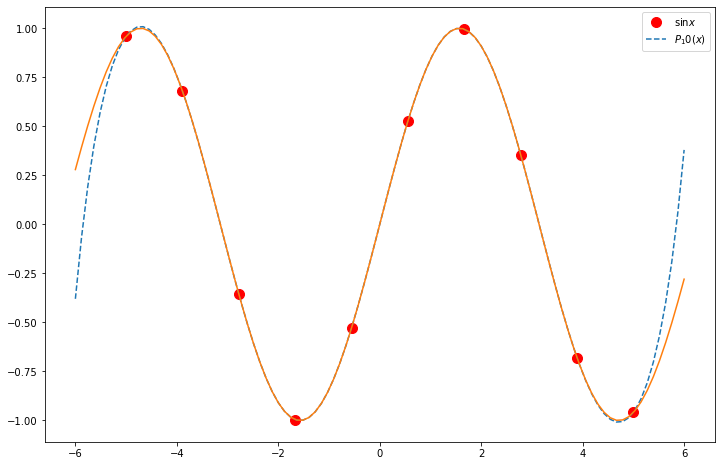

In [51]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(x,y,'ro',ms=10)
x_plot = np.linspace(-6,6,100)
V_plot = Vandermonde(x_plot,degree)
poly = np.matmul(V_plot,c.reshape(-1,1))
plt.plot(x_plot,poly, ls='--')
plt.plot(x_plot,np.sin(x_plot))
plt.legend(['$\sin{x}$','$P_10(x)$'])
V_plot.shape

## Using linear systems for least-squares curve fitting 

Consider the case when your data is unreliable(noisy). You can try to compensate for that by oversampling. The system of equations still looks like: 

$$ V \vec{p} = \vec{y}, $$

however
$$ \vec{y} \in \mathbb{R}^m, ~~ \vec{p} \in \mathbb{R}^m, ~~ p\ll m $$

Indtead of making sure the polynomial passes through our data, let's minimize some norm of the distance between the model output and the data: 

$$
    \min{E} = \left( \sum^m_{i=1} |y_i - P_n(x_i)|^2 \right )^{1/2},
$$

$$V^T V x = V^T y.$$

$$ V x =  y.$$

<!-- import numpy as np
x = np.linspace(0,5,50)
y = np.sin(x) + 0.2*np.random.normal(size=x.shape)
degree=5

def Vandermonde(x,degree):

    V = np.zeros((x.shape[0],degree +1 ))
    for idx in range(degree+1):
        V[:,idx] = np.power(x,idx)
    return  V

## Solve Vc = y
V = Vandermonde(x,degree)
c = np.linalg.solve(np.matmul(V.T,V),np.matmul(V.T,y))
print('c =', c) -->

<!-- plt.scatter(x,y)
x_plot = np.linspace(0,5,100)
V_plot = Vandermonde(x_plot,degree)
poly = np.matmul(V_plot,c.reshape(-1,1))
plt.plot(x_plot,poly) -->